# Exploratory Data Analysis

In [6]:
import pandas as pd

df = pd.read_csv('/content/Prepped_Sales.csv')

In [7]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name', 'day_of_week',
       'day_of_week_num', 'day_of_year', 'is_weekend', 'month', 'month_num',
       'week_of_year', 'week_start_date', 'order_hour', 'day_of_month',
       'quarter', 'is_month_start', 'is_month_end', 'time_bucket',
       'time_bucket_num'],
      dtype='object')

In [8]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,...,month_num,week_of_year,week_start_date,order_hour,day_of_month,quarter,is_month_start,is_month_end,time_bucket,time_bucket_num
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,...,1,1,2014-12-29,11,1,1,1,0,Morning,1
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,...,1,1,2014-12-29,11,1,1,1,0,Morning,1
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,...,1,1,2014-12-29,11,1,1,1,0,Morning,1
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,...,1,1,2014-12-29,11,1,1,1,0,Morning,1
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,...,1,1,2014-12-29,11,1,1,1,0,Morning,1


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

Monthly Sales Quantity

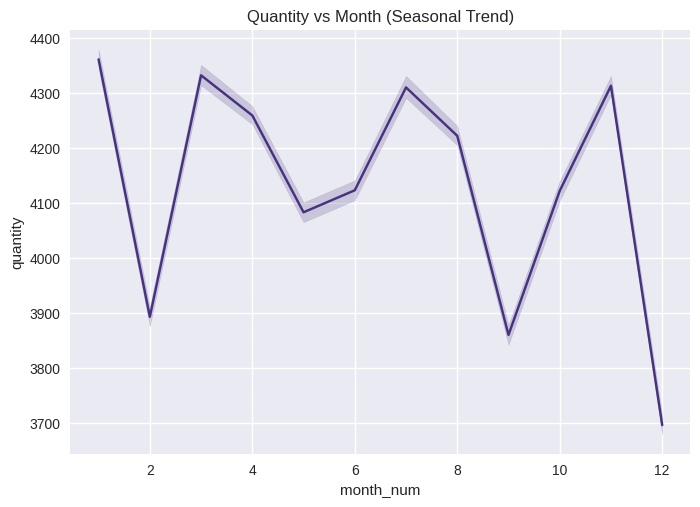

In [27]:
sns.lineplot(x="month_num", y="quantity", data=df, estimator="sum")
plt.title("Quantity vs Month (Seasonal Trend)")
plt.show()


Quantity Sold per Category

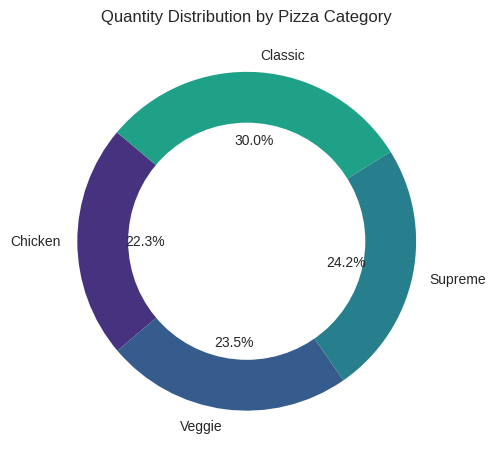

In [29]:
cat_qty = df.groupby("pizza_category")["quantity"].sum().sort_values()

plt.pie(cat_qty, labels=cat_qty.index, autopct="%1.1f%%", startangle=140)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Quantity Distribution by Pizza Category")
plt.show()

Quantity Sold per Pizza Size

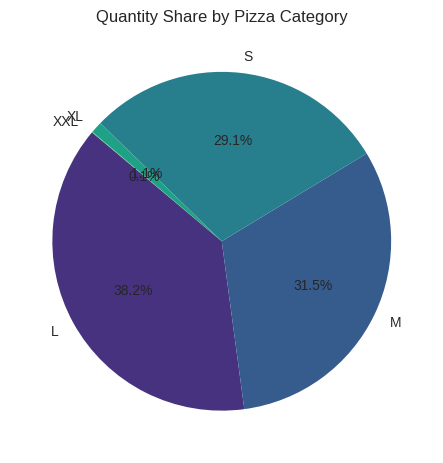

In [34]:
cat_qty = df.groupby("pizza_size")["quantity"].sum()

plt.pie(cat_qty, labels=cat_qty.index, autopct="%1.1f%%", startangle=140)
plt.title("Quantity Share by Pizza Size")
plt.show()

Quantity Sold based on week days

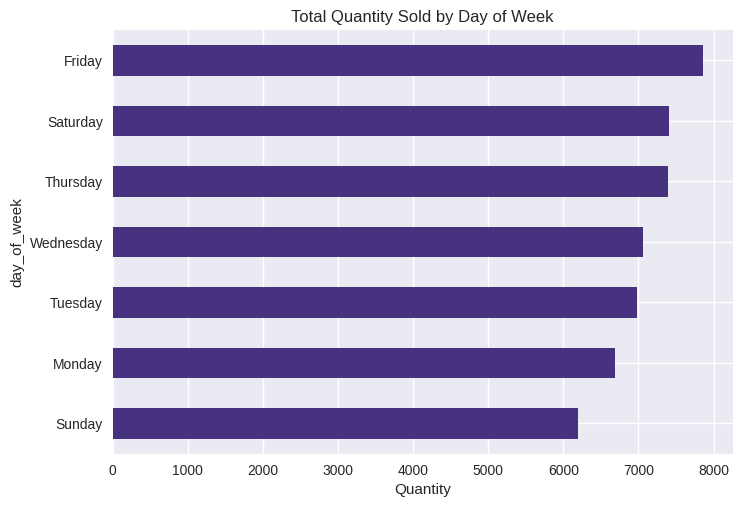

In [18]:
cat_qty = df.groupby("day_of_week")["quantity"].sum().sort_values()

cat_qty.plot(kind="barh")
plt.title("Total Quantity Sold by Day of Week")
plt.xlabel("Quantity")
plt.show()

Quantity Sold based on week ends

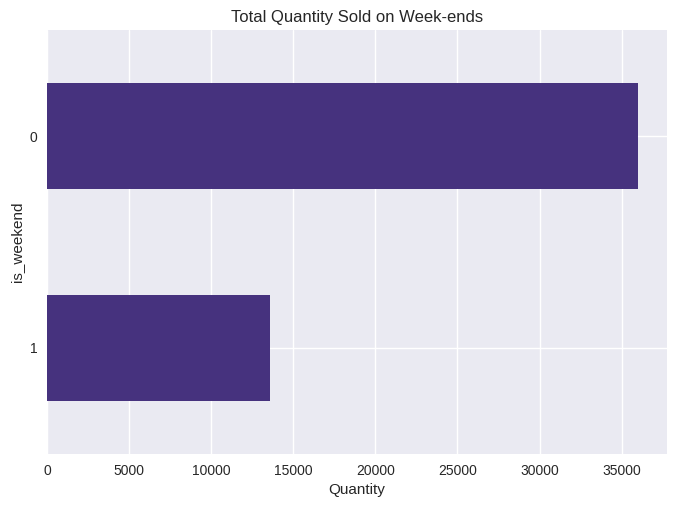

In [13]:
cat_qty = df.groupby("is_weekend")["quantity"].sum().sort_values()

cat_qty.plot(kind="barh")
plt.title("Total Quantity Sold on Week-ends")
plt.xlabel("Quantity")
plt.show()

Quantity Sold Month wise

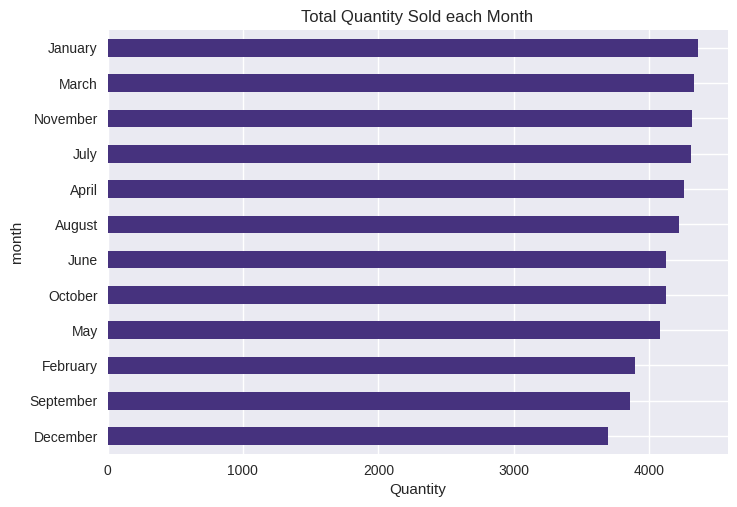

In [14]:
cat_qty = df.groupby("month")["quantity"].sum().sort_values()

cat_qty.plot(kind="barh")
plt.title("Total Quantity Sold each Month")
plt.xlabel("Quantity")
plt.show()

Quantity Sold each week

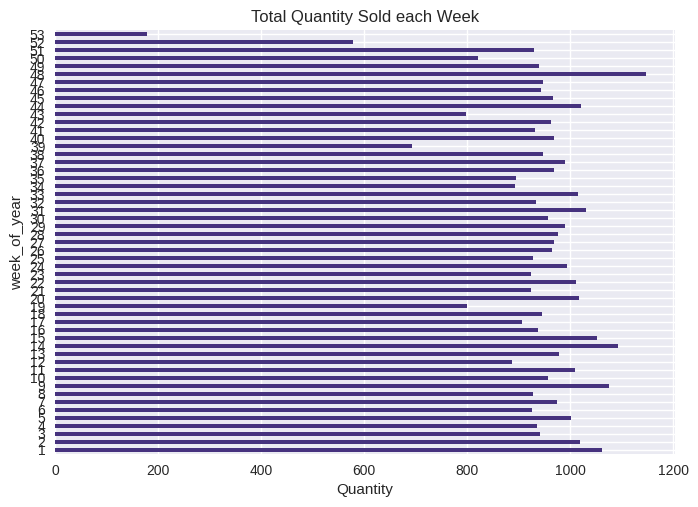

In [16]:
cat_qty = df.groupby("week_of_year")["quantity"].sum()

cat_qty.plot(kind="barh")
plt.title("Total Quantity Sold each Week")
plt.xlabel("Quantity")
plt.show()

Quantity sold on each Day

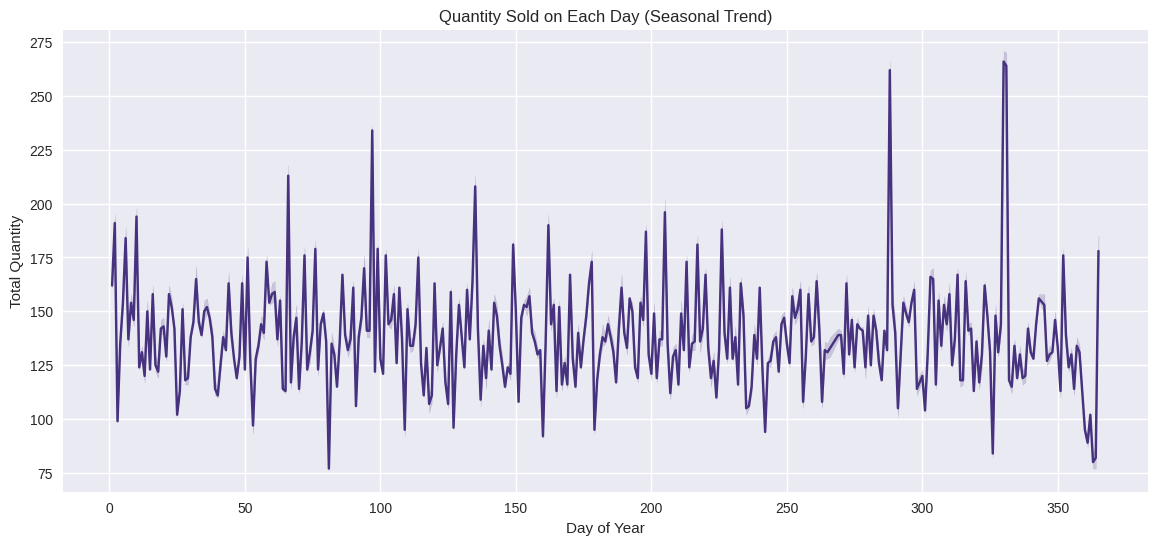

In [38]:
plt.figure(figsize=(14, 6))

sns.lineplot(x="day_of_year", y="quantity", data=df, estimator="sum")
plt.title("Quantity Sold on Each Day (Seasonal Trend)")
plt.xlabel("Day of Year")
plt.ylabel("Total Quantity")
plt.show()


Quantity Sold based on Time Zone

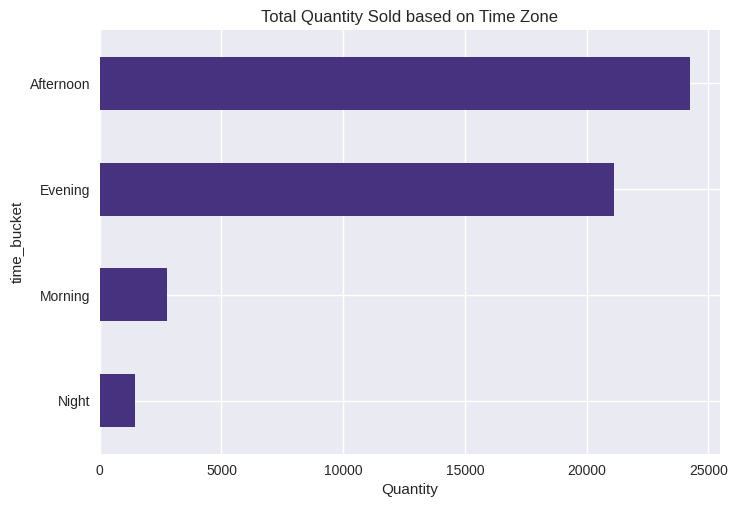

In [19]:
cat_qty = df.groupby("time_bucket")["quantity"].sum().sort_values()

cat_qty.plot(kind="barh")
plt.title("Total Quantity Sold based on Time Zone")
plt.xlabel("Quantity")
plt.show()

Orders by Category

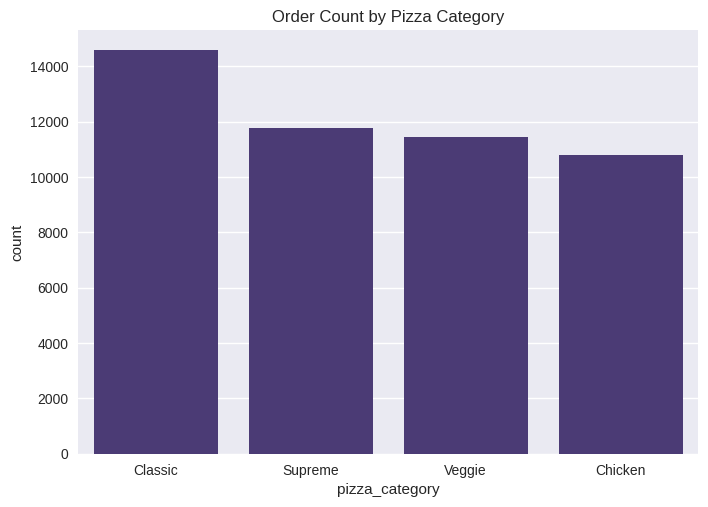

In [11]:
sns.countplot(x="pizza_category", data=df, order=df["pizza_category"].value_counts().index)
plt.title("Order Count by Pizza Category")
plt.show()

Quantity vs Pizza Types

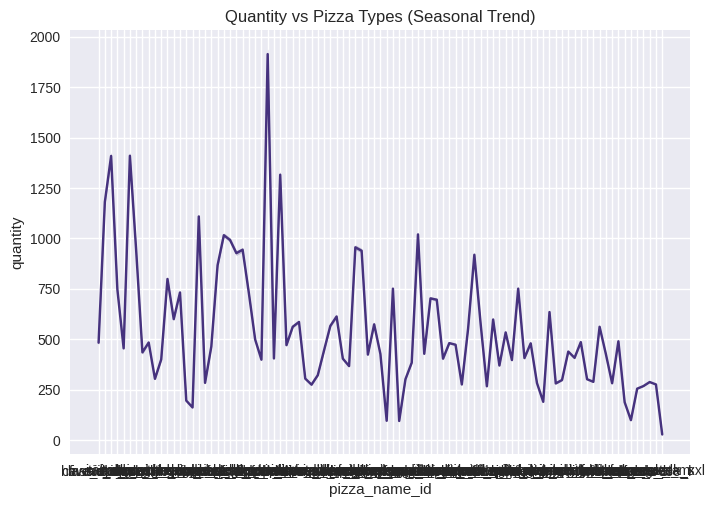

In [37]:
sns.lineplot(x="pizza_name_id", y="quantity", data=df, estimator="sum")
plt.title("Quantity vs Pizza Types (Seasonal Trend)")
plt.show()


Orders by Size

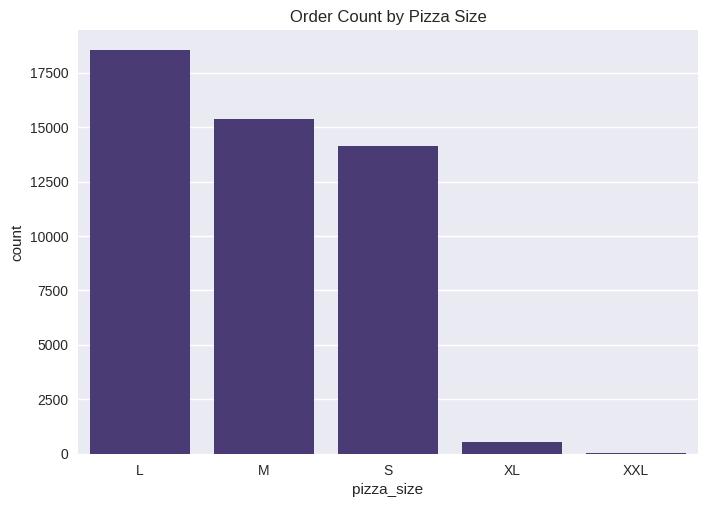

In [9]:
sns.countplot(x="pizza_size", data=df, order=df["pizza_size"].value_counts().index)
plt.title("Order Count by Pizza Size")
plt.show()

Top 10 Bestselling Pizzas

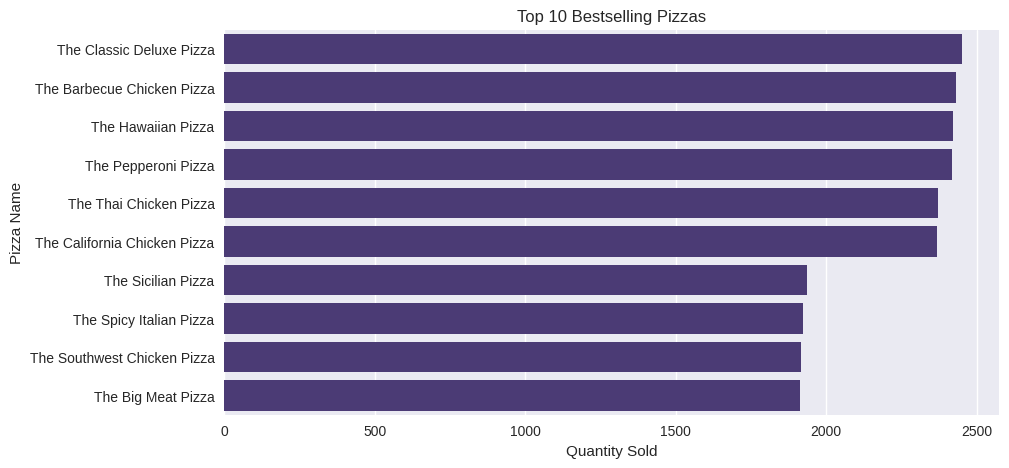

In [39]:
top_pizzas = df.groupby('pizza_name')[['quantity', 'total_price']].sum().sort_values(by='quantity', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_pizzas.reset_index(), y='pizza_name', x='quantity')
plt.title('Top 10 Bestselling Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

Correlation Heatmap

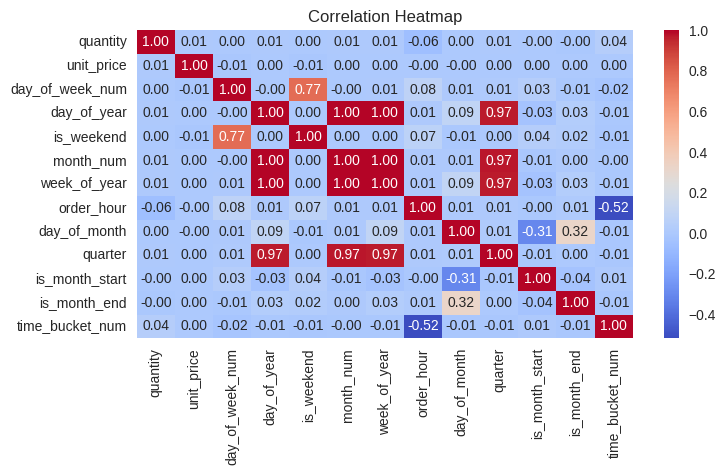

In [47]:
plt.figure(figsize=(8,4))
sns.heatmap(df[['quantity','unit_price', 'day_of_week_num', 'day_of_year',
        'is_weekend', 'month_num', 'week_of_year', 'order_hour', 'day_of_month',
        'quarter', 'is_month_start', 'is_month_end', 'time_bucket_num']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Daily Sales Trend with 7-Day Moving Average

Interpretation:

The blue line = actual daily sales

The red line = smoothed weekly trend

If it moves upward → positive growth trend

Downward → seasonal slowdown

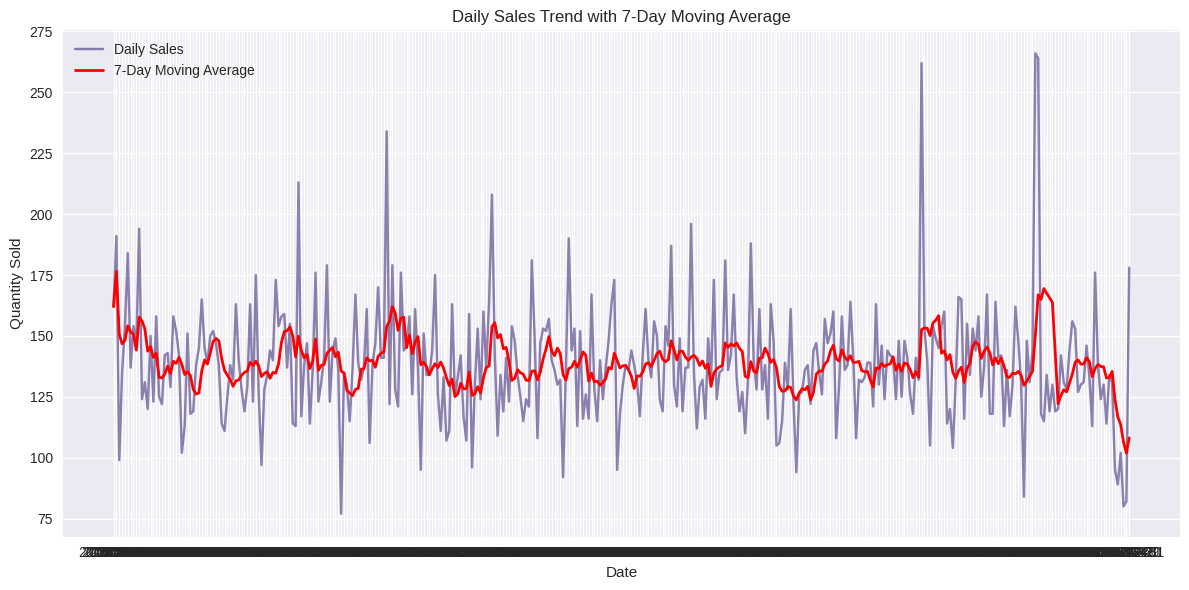

In [51]:
daily_sales = df.groupby('order_date')[['total_price', 'quantity']].sum().reset_index()
daily_sales = daily_sales.sort_values('order_date')
daily_sales.set_index('order_date', inplace=True)

plt.figure(figsize=(12, 6))

plt.plot(
    daily_sales.index,
    daily_sales['quantity'],
    label='Daily Sales',
    alpha=0.6
)

plt.plot(
    daily_sales.index,
    daily_sales['quantity'].rolling(window=7, min_periods=1).mean(),
    label='7-Day Moving Average',
    linewidth=2,
    color='red'
)

plt.title('Daily Sales Trend with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Seasonal Decomposition of Daily Sales

The seasonal decomposition of daily quantity sold reveals a stable long-term demand trend, strong weekly seasonality driven by weekday–weekend patterns, and residual fluctuations caused by irregular events such as promotions or holidays.

Every day, the number of pizzas sold changes because of  
(1) long-term growth or decline,  
(2) regular weekly habits, and  
(3) random unexpected events.”  

This plot separates these three effects, so we can understand why sales go up and down.

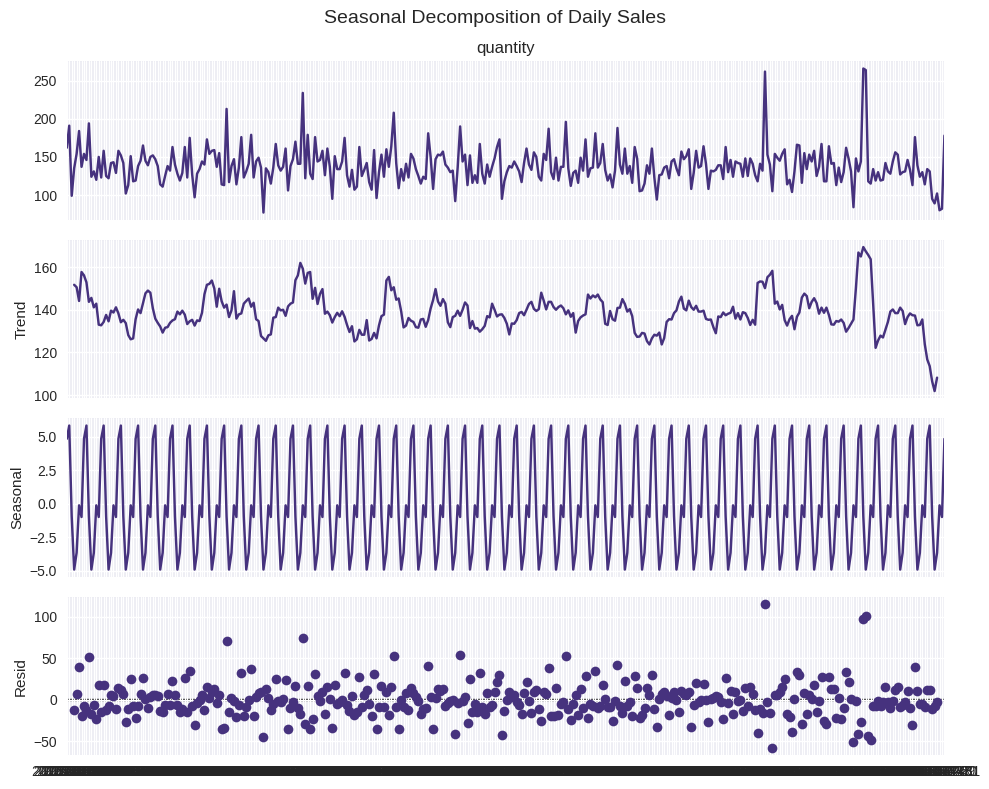

In [56]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aggregate daily sales
daily_sales = df.groupby('order_date')[['total_price', 'quantity']].sum()
daily_sales = daily_sales.sort_index()

# Apply seasonal decomposition (weekly seasonality)
result = seasonal_decompose(
    daily_sales['quantity'],
    model='additive',
    period=7
)

# Plot decomposition
plt.rcParams.update({'figure.figsize': (10,8)})

result.plot()
plt.suptitle('Seasonal Decomposition of Daily Sales', fontsize=14)
plt.tight_layout()
plt.show()


1) Observed   --- This is the real sales data — noisy, messy, and fluctuating.  
2) Trend      --- This tells us whether, overall, people are buying more pizzas or fewer pizzas as time goes on.  
Line going up → demand is slowly increasing  
Line going down → demand is decreasing  
Mostly flat → demand is stable  
This ignores daily ups and downs and focuses on the big picture.  
3) Seasonal (Weekly Pattern)  --- This shows how sales change during a typical week.  
4) Residual (Noise)   --- What is left over after removing trend and weekly pattern. These are unusual days that don’t follow the normal pattern.  

This plot shows that pizza sales change because of long-term demand, regular weekly habits, and a few unexpected events.

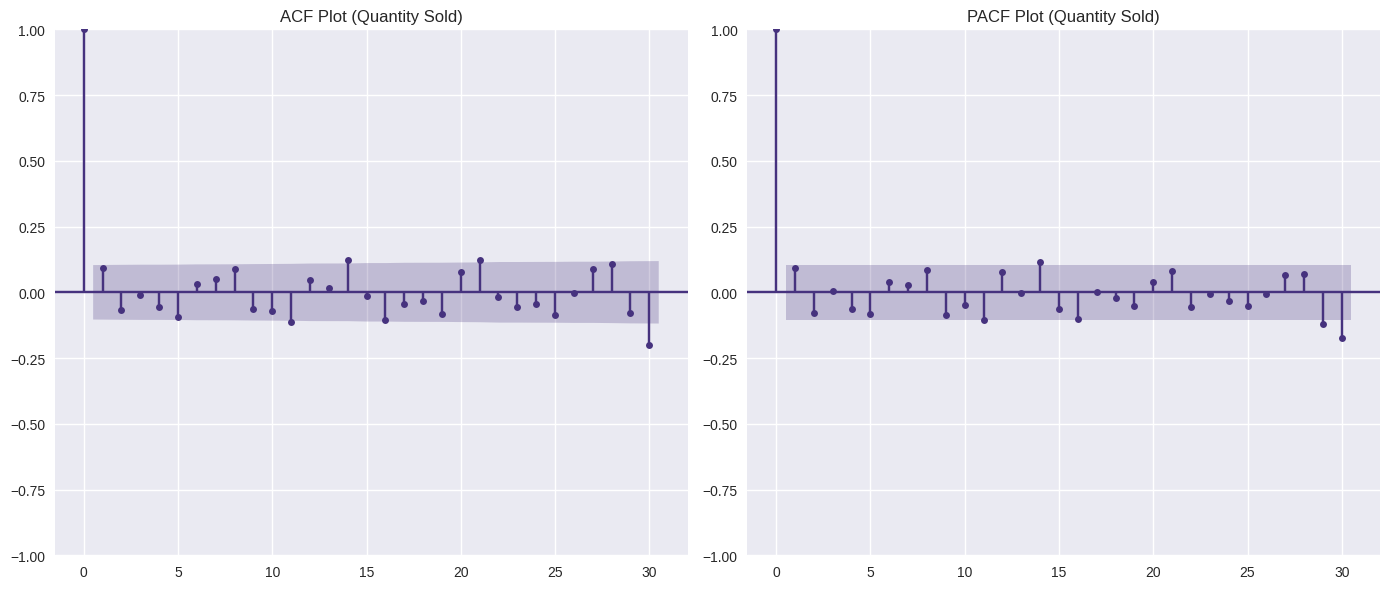

In [57]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use daily quantity time series
ts = daily_sales['quantity']

plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(1, 2, 1)
plot_acf(ts, lags=30, ax=plt.gca())
plt.title("ACF Plot (Quantity Sold)")

# PACF plot
plt.subplot(1, 2, 2)
plot_pacf(ts, lags=30, ax=plt.gca(), method='ywm')
plt.title("PACF Plot (Quantity Sold)")

plt.tight_layout()
plt.show()